# Revisualizing CAPEC Data Model

The purpose of this notebook is to document research and analysis done on the Common Attack Pattern Enumeration and Classification (CAPEC) for the ultimate goal of creating a corpus for PERCEIVE. For more information on CAPEC, refer [CAPEC Introduction](https://github.com/sailuh/perceive/blob/master/Notebooks/CAPEC/capec_introduction.ipynb).

CAPEC displays its data in two formats: the [CAPEC Website](http://capec.mitre.org/) and the CAPEC XML file. The CAPEC 2.9 XML file used and its accompanying XML Schema Documentation are both available for download on the website [CAPEC website](http://capec.mitre.org/data/index.html) under "Release Downloads." 

The representation of the data on the [website](http://capec.mitre.org/data/definitions/1000.html) is easier to navigate and easier to make sense of than the XML file. The website's interface for the Views allows you to easily explore through the developed hierarchical relationships due to the (+) and (-) buttons that allow you to expand the relationships. However, as we need to revisualize the representation, we need to scrape the XML and obtain relevant information in order to plot an interactive Voronoi treemap using [Foamtree](https://carrotsearch.com/foamtree/).

The two Views are Mechanisms of Attack and Domains of Attack. Category Entries have *MemberOf* relationships to and are separated based on these views depending on whether they pertain to mechanisms employed in exploiting a vulnerability or the domains on which the attacks are perpetrated.

In [2]:
from IPython.display import Image
Image(filename='../Visualization/img/types_of_nodes_and_their_relationships_based_on_mechanisms_and_domains_of_attack_views.png')

Below Category Entries are the Attack Pattern Entries; It is important to note that there are three types of Attack Pattern Entries: Meta, Standard, and Detailed. These three terms refer to the level of abstraction in the particular Attack Pattern Entries.  

Meta Attack Pattern Entries are directly below Category Entries in the hierarchy and have the *MemberOf* relationship to these Categories. As the Categories are ways of sorting Attack Patterns, a given Meta Attack Pattern Entry will be a *MemberOf* two categories, one for each View. Meta Attack Pattern Entries have *Child* nodes that can be either Standard or Detailed Attack Patterns. These two abstraction types of Attack Patterns do not have a relationship to the Categories. Standard Attack Pattern Entries may also have their own Child, which will always be a Detailed Attack Pattern.

Given that Views and Categories are primarily methods of organizing Attack Patterns, we are specifically interested in the Attack Patterns and the Fields that they contain.

The challenge in extracting from the XML is that, while in the website, each Standard Attack Pattern is under a Meta Attack Pattern and each Meta Attack Pattern is in turn under a Category, the XML organization is not that simple.

The Categories are represented in the Categories table (or tag) of the XML and their titles are mentioned in attributes. Similarly, the Meta attack patterns are represented in the Attack Patterns table (or tag) of the XML and their titles are mentioned in attributes.

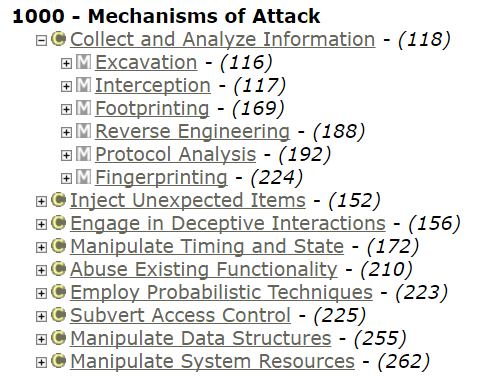

In [6]:
from IPython.display import Image
Image(filename='../Visualization/img/capec_website_representation.PNG')

The parent node of each attack pattern is mentioned via the Related Attack Patterns tag and the Relationship Target ID under it. The Relationship Nature is *ChildOf*.

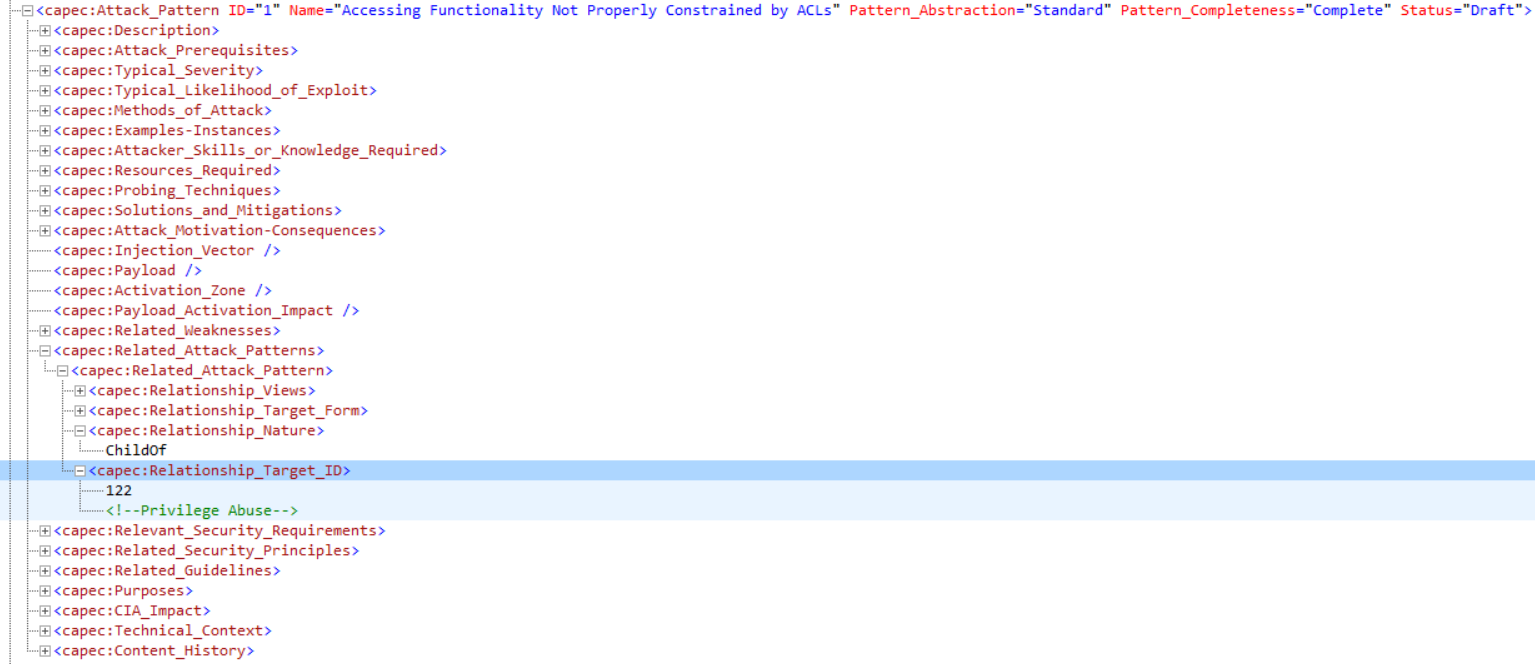

In [3]:
from IPython.display import Image
Image(filename='../Visualization/img/standard_attack_pattern_relationship.PNG')

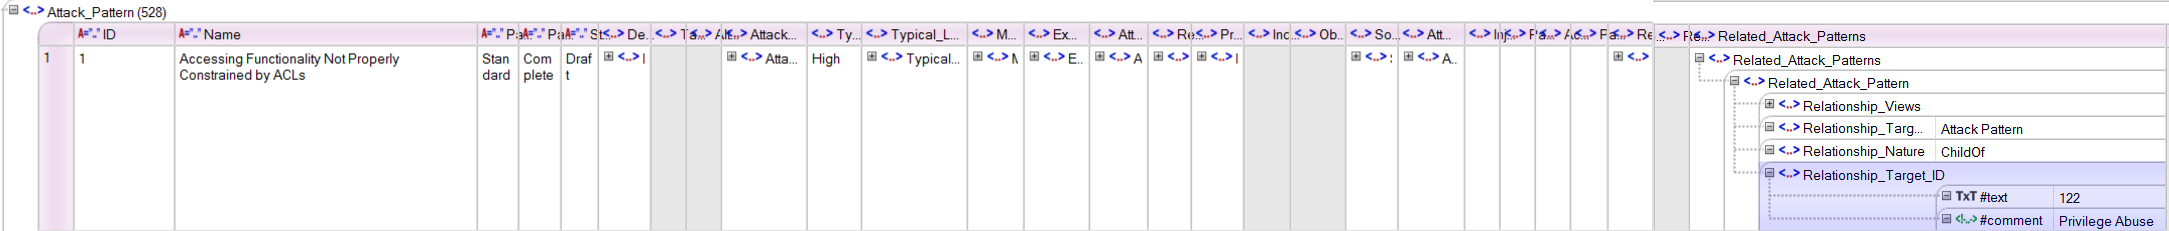

In [15]:
from IPython.display import Image
Image(filename='../Visualization/img/standard_attack_pattern_relationship_alt.PNG')

In the above images, the **CAPEC ID 1 - Accessing Functionally Not Properly Constrained by ACLs** has its name under the **Name** attribute and is a _ChildOf_ **CAPEC ID 122 - Privilege Abuse** through the Related_Attack_Pattern tag.

The implication is that the relationships of Meta attack patterns aren't mentioned in the Attack Patterns.

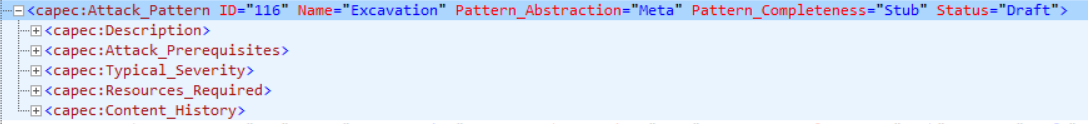

In [4]:
from IPython.display import Image
Image(filename='../Visualization/img/meta_attack_pattern_relationship_missing.PNG')

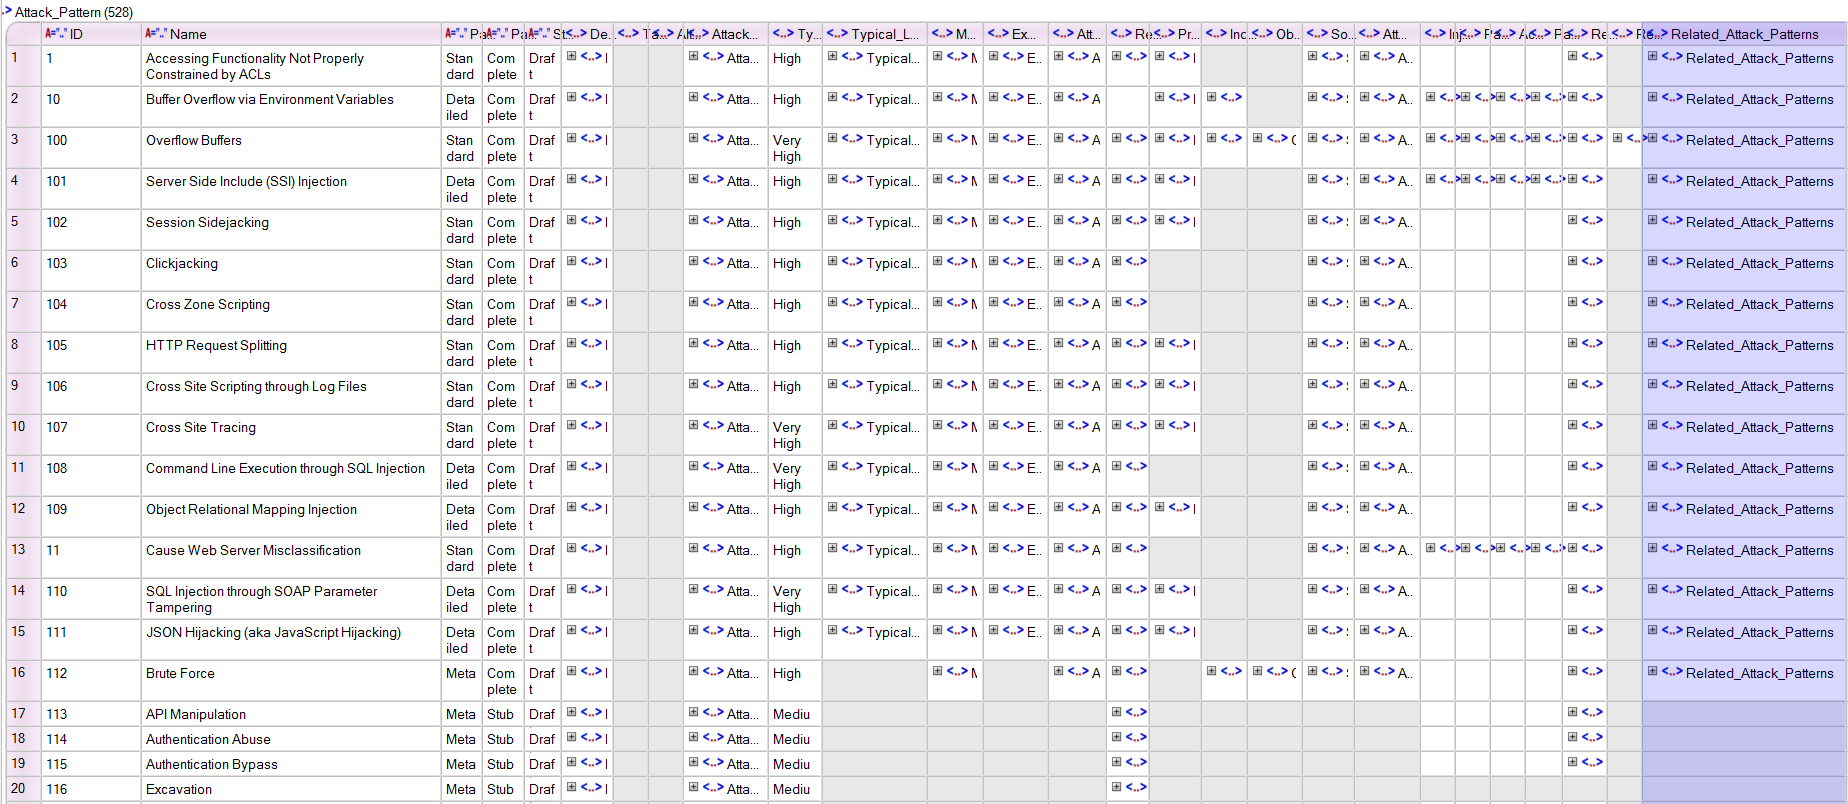

In [16]:
from IPython.display import Image
Image(filename='../Visualization/img/meta_attack_pattern_relationship_missing_alt.PNG')

From the above images, it is evident that Meta Attack Patterns such as CAPEC 116 - Excavation do not have any **Related_Attack_Patterns** under the Attack Pattern Table (or tag).

These relationships are under Categories but not as *ChildOf* relationship nature, but in the other way around. The Meta Attack Patterns are included as *HasMember* relationship type under the main Category

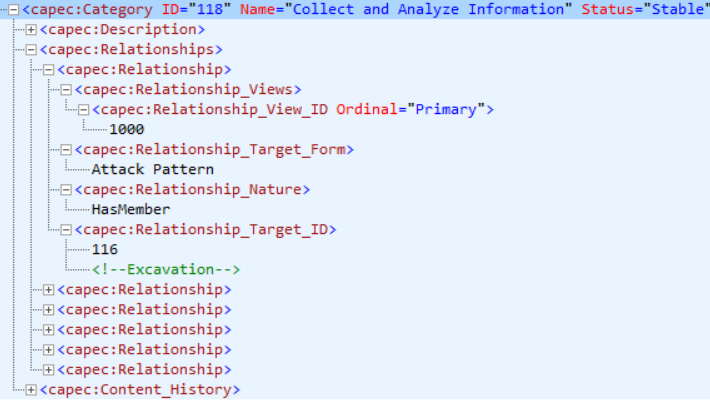

In [5]:
from IPython.display import Image
Image(filename='../Visualization/img/meta_attack_pattern_relationship.PNG')

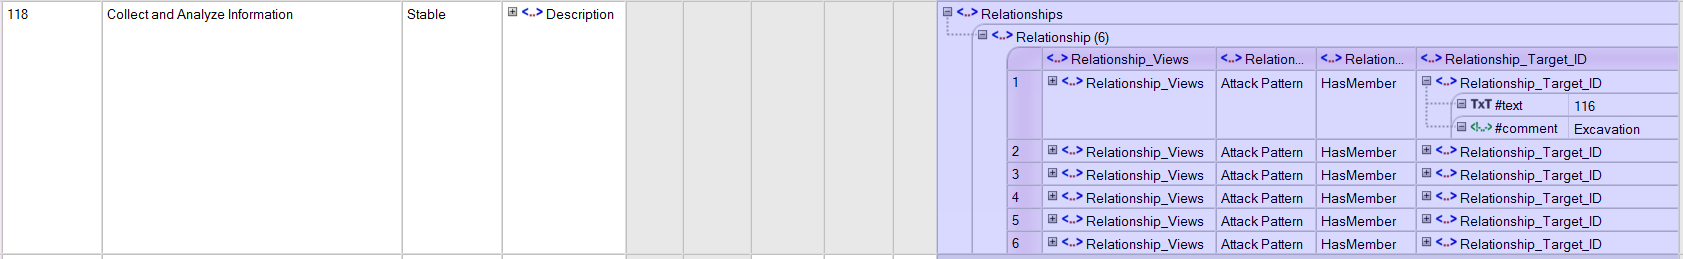

In [17]:
from IPython.display import Image
Image(filename='../Visualization/img/meta_attack_pattern_relationship_alt.PNG')

These images indicate that the relationships of each Meta Attack Pattern is under the Categories table, nested under each Category not as a _ChildOf_ relationship but as a _HasMember_ relationship.

# Parsing the XML File

Since the child node parent node relationship is convoluted in the XML, we must first bring them to a uniform format. The following python script has three logical blocks and takes as input two parameters:

1. path of the CAPEC XML file.
2. path of the Foamtree JavaScript file.

The first part of the program creates a CSV file which contains **CAPEC_ID, CAPEC_NAME, CHILD_OF** columns and parses the XML to populate various categories, meta attack patterns and their child standard attack patterns.

The second part involves parsing this CSV file to a JSON object that can be used for the Foamtree visualization. The JSON is then fed into the dataObject variable in the JavaScript and hence must follow the [standards](https://get.carrotsearch.com/foamtree/latest/api/index.html#dataObject) set by Foamtree.

The final part involves putting together the JavaScript file whose path has been obtained as input 2 in a HTML file and then adding the JSON data into the dataObject variable in the JavaScript to obtain the final visualization.

The program exports the following files:

1. CAPEC_csv
2. CAPEC_json
3. CAPEC_html

In [4]:
import os
import sys

import csv
import xml.etree.ElementTree as ET

import json

import argparse

parser = argparse.ArgumentParser(description = 'CAPEC XML visualisation program.')
parser.add_argument('xml_filepath', help = 'path of the capec xml file')
parser.add_argument('javascript_filepath', help = 'path of the carrotsearch.foamtree.js file')
parser.add_argument("--json", help = "export .json file", action = "store_true")
parser.add_argument("--gephi", help = "export node and edge table for gephi visualisation", action = "store_true")
args = parser.parse_args()

usage: __main__.py [-h] [--json] [--gephi] xml_filepath javascript_filepath
__main__.py: error: the following arguments are required: javascript_filepath


SystemExit: 2

C:\Users\koolv\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


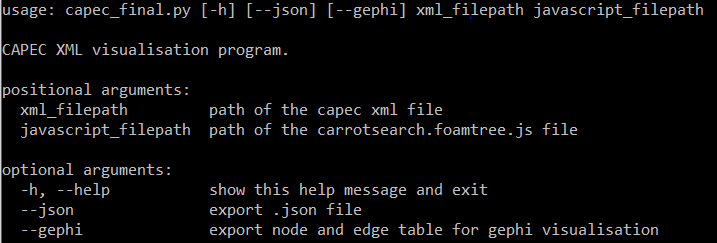

In [5]:
from IPython.display import Image
Image(filename='../Visualization/img/capec_final_usage.PNG')

In [5]:
filepath = args.xml_filepath
javascript_path = args.javascript_filepath

"""Obtaining the CAPEC xml filename from the path"""
CAPEC_xml = filepath.split(os.sep)[-1]

"""Obtaining the CAPEC version from the filename and using it to rename other files"""
CAPEC_version = CAPEC_xml[:-4]
CAPEC_json = CAPEC_version + ".json"
CAPEC_html = CAPEC_version + ".html"
CAPEC_csv_edgelist = CAPEC_version + " [Edges].csv"
CAPEC_csv_nodelist = CAPEC_version + " [Nodes].csv"

"""This is the inline data model.
   This contains CAPEC_ID, CAPEC_NAME and CHILD_OF nodes.
   This can be extended to have more details.
"""
CAPEC_entries = list()

CAPEC_tree = ET.parse(filepath)
CAPEC_root = CAPEC_tree.getroot()

def remove_commas(string):
    """The purpose of this function is to remove the commas in the string that is passed as input. 
       The need is that some of the CAPEC names contain commas and when eventually added to a CSV file, they occupy multiple 
       cells instead of just one. In order to overcome that we pass the CAPEC name and obtain the "comma-less" version of it.
    """
    comma_free_string = ''
    temp_string = string.split(',')
    for i in temp_string:
        comma_free_string+=i
    return comma_free_string

"""There are three for loops which write to the data model.
   
   The first one is used to write the categories with parent as 1000 - Mechanisms of Attack
   CAPEC_root[0][0] is used to obtain capec:Views and then under it the first tag that contains Mechanisms of attack categories
   
   After obtaining the capec_id, we search for the name in the capec:Categories which is CAPEC_root[1] 
"""
for division in CAPEC_root[0][0]:
    for parameter in division:
        if parameter.tag=="{http://capec.mitre.org/capec-2}Relationship":
            capec_id = parameter[3].text
            child_of = '1000'
            for category in CAPEC_root[1]:
                if category.attrib['ID']==capec_id:
                    capec_name = remove_commas(category.attrib['Name'])
                    temp_list = list()
                    temp_list.extend((capec_id,capec_name,child_of))
                    CAPEC_entries.append(temp_list)

"""The second one is used to write the Meta Attack Patterns onto the data model
   CAPEC_root[1] is used to obtain the capec:Categories tag.
   
   relationship_parameter[2] is capec:Relationship_Nature
   relationship_parameter[3] is capec:Relationship_Target_ID
"""
for attack_pattern in CAPEC_root[1]:
    if attack_pattern.attrib['Status']!="Deprecated":
        for parameter in attack_pattern:
            if parameter.tag=="{http://capec.mitre.org/capec-2}Relationships":
                for relationship_parameter in parameter:
                    if relationship_parameter[2].text=="HasMember":
                        child_of = attack_pattern.attrib['ID']
                        capec_id= relationship_parameter[3].text 
        
                        for attack_pattern_matcher in CAPEC_root[2]:
                            if attack_pattern_matcher.attrib['ID']==capec_id:
                                capec_name= remove_commas(attack_pattern_matcher.attrib['Name'])
                        temp_list = list()
                        temp_list.extend((capec_id,capec_name,child_of))
                        CAPEC_entries.append(temp_list)

"""The third and final loop is used to add the Standard Attack Patterns onto the data model
   CAPEC_root[2] is used to select capec:Attack_Patterns
"""
for attack_pattern in CAPEC_root[2]:
    if attack_pattern.attrib['Status']!="Deprecated":
        for parameter in attack_pattern:
            if parameter.tag=="{http://capec.mitre.org/capec-2}Related_Attack_Patterns":
                for related_attack_pattern_parameter in parameter:
                    if related_attack_pattern_parameter[2].text=="ChildOf":
                        capec_id= attack_pattern.attrib['ID']
                        capec_name= remove_commas(attack_pattern.attrib['Name'])
                        child_of= related_attack_pattern_parameter[3].text
                        temp_list = list()
                        temp_list.extend((capec_id,capec_name,child_of))
                        CAPEC_entries.append(temp_list)

NameError: name 'args' is not defined

In [2]:
def jsonify(number):
    """This iterative function is used to build the JSON in the format that foamtree javascript requires. 
       It reads off the inline data model which contains the [0]th element as CAPEC_ID, [1] - CAPEC_NAME and 
       [2] - CHILD_OF CAPEC_ID.
       
       The member_dict["label"] is used to name each element in the representation. 
       The current naming scheme is <CAPEC_ID> - <CAPEC_NAME>
    """
    main_list = list()
    for row in CAPEC_entries:
        parent_id = str(number)
        if row[2]==parent_id:
            member_dict = dict()
            member_dict["label"] = str(row[0]) + ' - ' + str(row[1])
            member_dict["weight"] = 1
            member_dict["groups"] = jsonify(row[0])
            main_list.append(member_dict)
        else:
            continue
    return main_list

def gephi_export(number): 
    """This function takes in the View ID that is to be exported. In our program we pass 1000 as it refers to 
       Mechanisms of Attack.
       
       It creates two CSVs - edgelist and nodelist. These can be loaded onto Gephi for visualization.
       
       The edges are created as Directed edges.
    """
    fe = open(CAPEC_csv_edgelist, 'w')
    HEADe = "Source,Target,Type,id,label,timeset,weight\n"
    fe.write(HEADe)
    
    fn = open(CAPEC_csv_nodelist, 'w')
    HEADn = "Id,Label,timeset\n"
    fn.write(HEADn)

    capecid_id_dict = dict()
    capecid_id_dict[str(number)]='0'
    node = '{o1},{o2},{o3}\n'.format(o1='0',o2=number,o3='')
    fn.write(node)
    id_counter = 1
    for row in CAPEC_entries:
        node = '{o1},{o2},{o3}\n'.format(o1=id_counter,o2=row[0],o3='')
        fn.write(node)
        capecid_id_dict[row[0]]=id_counter
        id_counter+=1

    type_value = "Directed"
    edge_id_counter = 0
    for row in CAPEC_entries:
        if row[2] in capecid_id_dict:
            src = int(capecid_id_dict[row[2]])
            tgt = int(capecid_id_dict[row[0]])
            edge = '{o1},{o2},{o3},{o4},{o5},{o6},{o7}\n'.format(o1=src,o2=tgt,o3=type_value,o4=edge_id_counter,o5='',o6='',o7=1)
            fe.write(edge)
            edge_id_counter+=1

def createJSON():
    """This function is used to create the JSON export file."""
    with open(CAPEC_json,'w') as jsonfile:
        json.dump(CAPEC_dict, jsonfile)
    jsonfile.close()

The JSON objected created follows the [following rules](https://get.carrotsearch.com/foamtree/latest/api/index.html#dataObject) which requires a format such as:

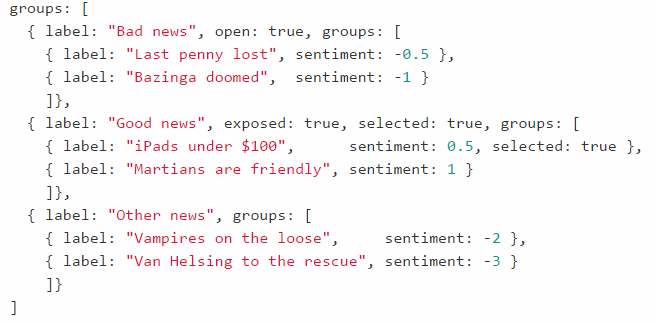

In [19]:
from IPython.display import Image
Image(filename='../Visualization/img/expected_json.PNG')

The JSON that we export looks like this:

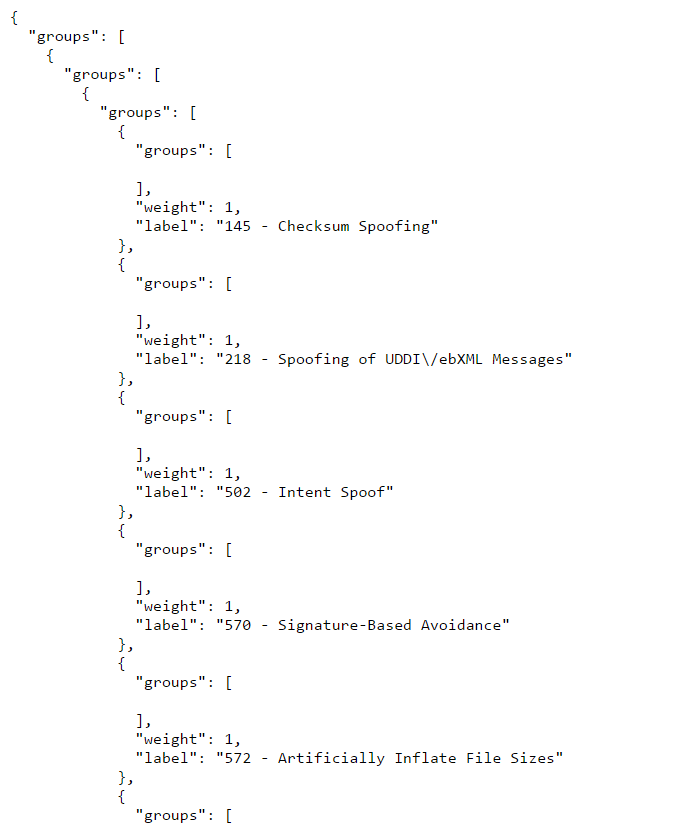

In [20]:
from IPython.display import Image
Image(filename='sample_json.PNG')

In [ ]:
def createHTML():
    """we build the HTML to visualize the JSON using Foamtree javascript.
       foamtreetemplate1 and foamtreetemplate2 are part of the final HTML visualization file.
    """
    foamtreetemplate1 = '''<!DOCTYPE html>
    <html>
      <head>
        <title>FoamTree Quick Start</title>
        <meta charset="utf-8" />
      </head>

      <body>
        <div id="visualization" style="width: 800px; height: 600px"></div>

        <script src="'''+ javascript_path +'''"></script>
        <script>
          window.addEventListener("load", function() {
            var foamtree = new CarrotSearchFoamTree({
              id: "visualization",
              dataObject:'''

    foamtreetemplate2 = '''});
          });
        </script>
      </body>
    </html>'''

    with open(CAPEC_html,'w') as outputfile:
        outputfile.write(foamtreetemplate1)
        for line in open(CAPEC_json):
            outputfile.write(line)
        outputfile.write(foamtreetemplate2)


In [ ]:
CAPEC_dict = dict()
CAPEC_dict["groups"]=jsonify(1000)
createJSON()
createHTML()

if args.gephi:
    gephi_export(1000)

if args.json == False:
    os.remove(CAPEC_json)

We invoke the createJSON function regardless of whether --json is set. This is because the createHTML function depends on the json file to write to the HTML.

The final HTML export looks like this (CAPEC v2.9): 

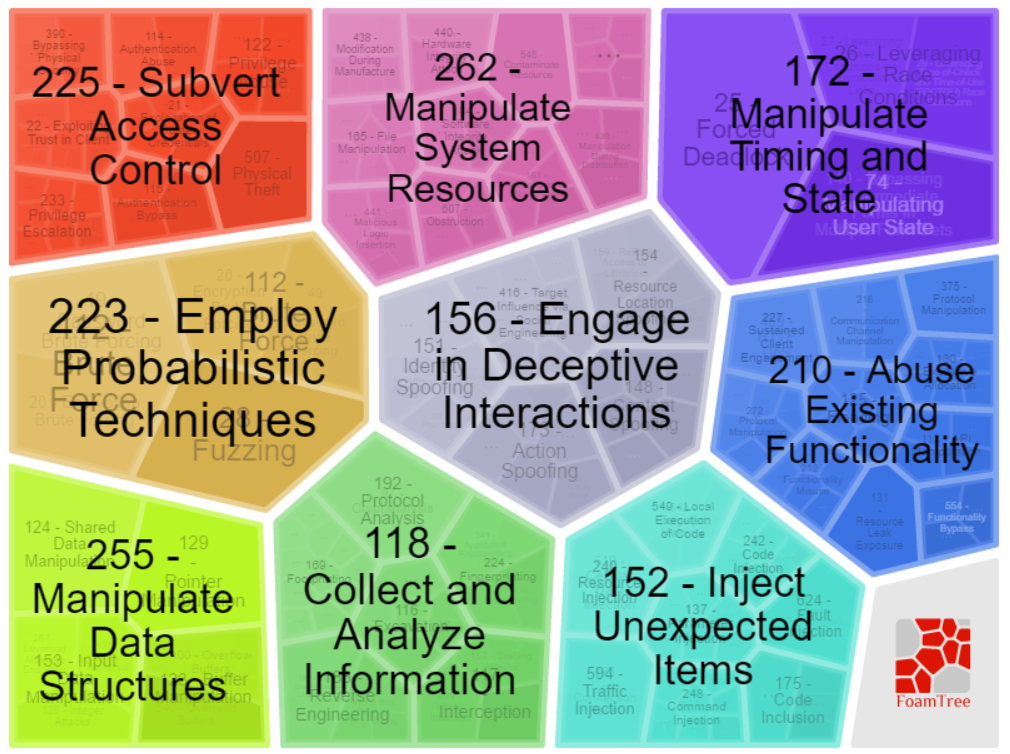

In [23]:
from IPython.display import Image
Image(filename='../Visualization/img/sample_html.PNG')

Gephi graph after importing both edge table and node tables.

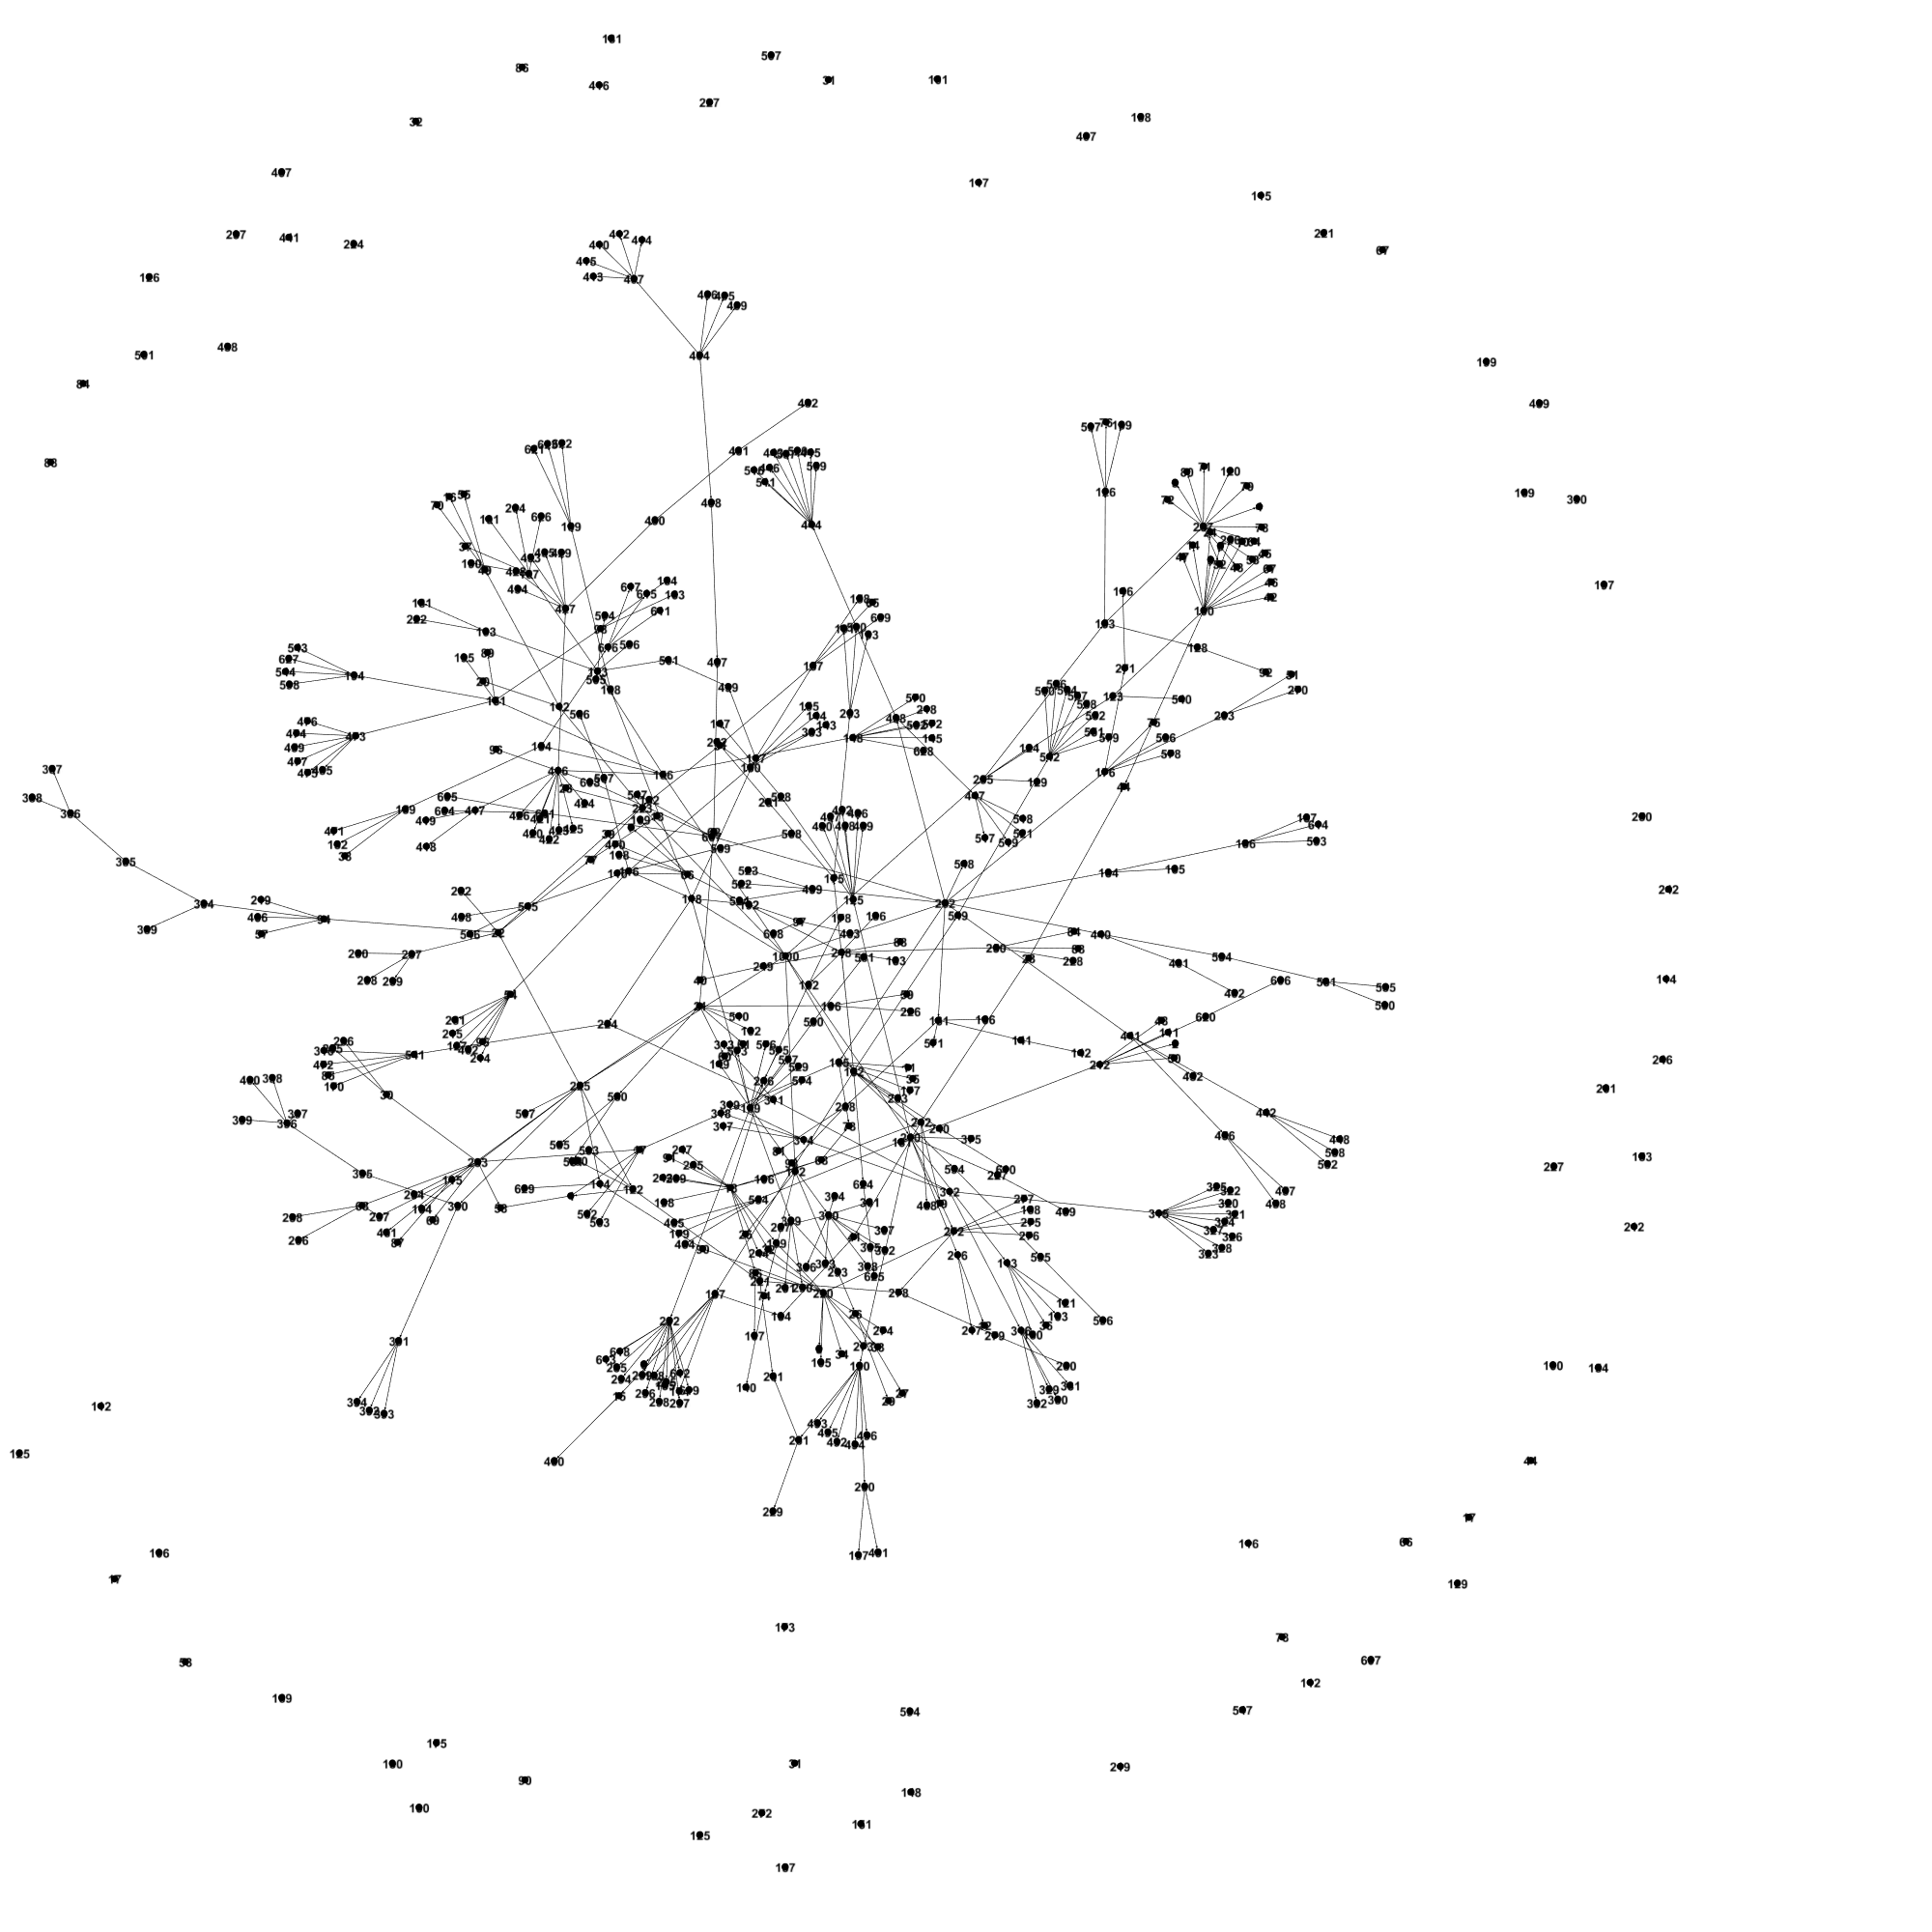

In [7]:
from IPython.display import Image
Image(filename='../Visualization/img/capec_v2.9.png')

## CAPEC Version compatibility

* <font color = 'red'> Version 1.0 </font>
* <font color = 'red'> Version 1.1 </font>
* <font color = 'red'> Version 1.2 </font>
* <font color = 'red'> Version 1.3 </font>
* <font color = 'red'> Version 1.3.1 </font>
* <font color = 'red'> Version 1.3.2 </font>
* <font color = 'red'> Version 1.4 </font>
* <font color = 'red'> Version 1.5 </font>
* <font color = 'red'> Version 1.6 </font>
* <font color = 'red'> Version 1.7 </font>
* <font color = 'red'> Version 1.7.1 </font>
* <font color = 'green'> Version 2.0 </font>
* <font color = 'green'> Version 2.1 </font>
* <font color = 'green'> Version 2.2 </font>
* <font color = 'green'> Version 2.3 </font>
* <font color = 'green'> Version 2.4 </font>
* <font color = 'green'> Version 2.5 </font>
* <font color = 'green'> Version 2.6 </font>
* <font color = 'green'> Version 2.7 </font>
* <font color = 'green'> Version 2.8 </font>
* <font color = 'green'> Version 2.9 </font>
* <font color = 'green'> Version 2.10 </font>

The reason the script does not work for scripts below CAPEC v2.0 is because of the way the XML tags are labelled. 

In the first version of CAPEC, v1.0, we see that all the XML contains only Attack Pattern tags.

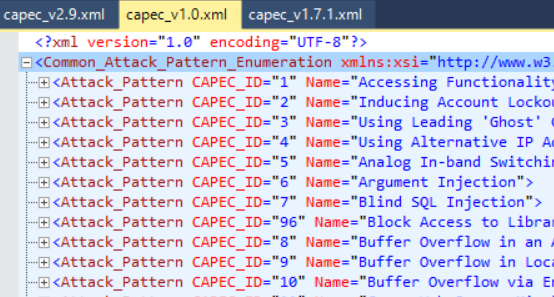

In [1]:
from IPython.display import Image
Image(filename='../Visualization/img/capec_v1_xmlstructure.PNG')

In the CAPEC v1.7.1, we see that this XML is now divided into four main tags.

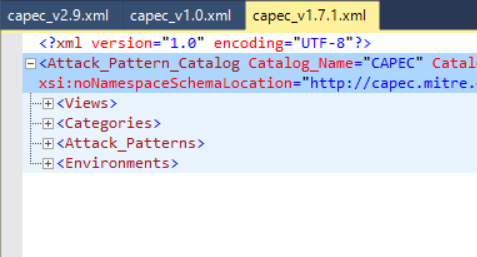

In [2]:
from IPython.display import Image
Image(filename='capec_v1.7_xmlstructure.PNG')

In the latest versions of CAPEC we see a slight change from 1.7.1.

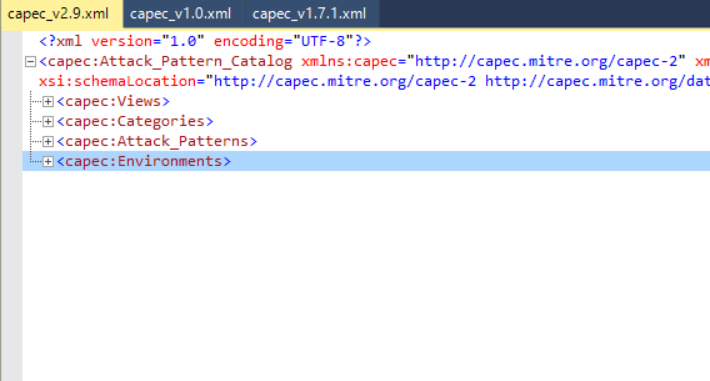

In [3]:
from IPython.display import Image
Image(filename='../Visualization/img/capec_v2.9_xmlstructure.PNG')

The reason the script is ineffective against versions 1.7.1 and below is because of two reasons, 

1. The XML structure is different
2. The naming conventions of the tags are different (comparing v1.7.1 and v2.xx)

The script can be extended by identifying under which category the provided XML falls under and running different functions. The primary module to be changed between the three versions is how the inline data model is built - more precisely the 3 for loops. In this script we have hardcoded the **parameter tag** to deal with CAPEC v2.xx structures. By studying the older CAPEC versions XML structure we can identify how the parameters were tagged in those specific XMLs and use the for loops. 

# Final thoughts and Corpus

This CAPEC XML format was introduced with the capec_v2.0.xml and continues until now. All these XMLs can be visualized using this code. By running it through 10 different versions of CAPEC, one thing is certain - the Categories primarily remain the same (only their names change, to more Machine Learning friendly ones). The number of categories has reduced from the first CAPEC version but that is because more knowledge about them is obtained and they are modified with that existing knowledge to improve the initial draft of them. Over the past three versions - v2.8, v2.9 and v2.10, the categories are merely reworded and not removed.

This is a key factor in determining the corpus. We will need the corpus to provide us with the percentage similarity against each type of group. Categories can be part of that initial group which can be used to filter which "Category" the provided exploit is similar to. This can further be refined by using the Meta Attack Patterns under it to further classify which looks most in line with the given exploit. We could use the Meta Attack Patterns as Categories for the corpus but that would provide us with a lot of computations - most of which may not be related to the given exploit. Therefore, we could use the Categories as the primary group for comparison and then move forward with the Meta Attack Patterns under the most similar Category to classify any given exploit.